# Accidental Drug Related Deaths

This is an analysis of Accidental Drug Related Deaths in the US between the years 2012-2018

__Data set from:__ https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015

The analysis explores the following questions:

### *Primary Question:*
1. What is the most significant factor determining accidental drug-related death?

### *Secondary Questions:*
1. Which drug or combinations of drugs were most lethal?
2. How significant is ‘Age’ as an explanatory variable?
3. How significant is ‘Race’ as an explanatory variable?
4. Place of death (Residence vs. Other) significant?
5. Optional variable we could analyze: Description of Injury (Drug Use, Ingestion, Injection, etc)

In [133]:
#Imports - Numpy, Pandas, MatPlotLib, Seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#Show plots magic function
%matplotlib inline

## EDA

In [169]:
#Get the file and assign it to add_df (stands for Accidental Drug Deaths DataFrame)
#add_df = pd.read_csv('../data/raw/Accidental_Drug_Related_Deaths_2012-2018.csv')
DrugData = pd.read_csv('../data/raw/Accidental_Drug_Related_Deaths_2012-2018.csv')
Holiday_Data=pd.read_csv('../data/raw/US Holidays 2012-2018.csv',sep=',')

#Check the info and data
DrugData.info()
DrugData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 41 columns):
ID                     5105 non-null object
Date                   5103 non-null object
DateType               5103 non-null object
Age                    5102 non-null float64
Sex                    5099 non-null object
Race                   5092 non-null object
ResidenceCity          4932 non-null object
ResidenceCounty        4308 non-null object
ResidenceState         3556 non-null object
DeathCity              5100 non-null object
DeathCounty            4005 non-null object
Location               5081 non-null object
LocationifOther        590 non-null object
DescriptionofInjury    4325 non-null object
InjuryPlace            5039 non-null object
InjuryCity             3349 non-null object
InjuryCounty           2364 non-null object
InjuryState            1424 non-null object
COD                    5105 non-null object
OtherSignifican        169 non-null object
Heroin        

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo
0,12-0001,01/01/2012 12:00:00 AM,DateofDeath,35.0,Male,White,HEBRON,TOLLAND,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HEBRON, CT\r\n(41.658069, -72.366324)",NaN,"HEBRON\r\n(43.694742, -71.808963)"
1,12-0002,01/03/2012 12:00:00 AM,DateofDeath,41.0,Male,White,BRISTOL,HARTFORD,NaN,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bristol, CT\r\n(41.673037, -72.945791)",NaN,"BRISTOL\r\n(41.673037, -72.945791)"
2,12-0003,01/04/2012 12:00:00 AM,DateofDeath,61.0,Male,Black,DANBURY,FAIRFIELD,NaN,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Danbury, CT\r\n(41.393666, -73.451539)",NaN,"DANBURY\r\n(41.393666, -73.451539)"
3,12-0004,01/05/2012 12:00:00 AM,DateofDeath,51.0,Male,White,STRATFORD,FAIRFIELD,NaN,BRIDGEPORT,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRIDGEPORT, CT\r\n(41.179195, -73.189476)",NaN,"STRATFORD\r\n(41.200888, -73.131323)"
4,12-0005,01/07/2012 12:00:00 AM,DateofDeath,45.0,Male,White,HARTFORD,HARTFORD,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\r\n(41.765775, -72.673356)",NaN,"HARTFORD\r\n(41.765775, -72.673356)"
5,12-0006,01/08/2012 12:00:00 AM,DateofDeath,51.0,Male,White,WATERBURY,NEW HAVEN,NaN,WATERBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Waterbury, CT\r\n(41.554261, -73.043069)",NaN,"WATERBURY\r\n(41.554261, -73.043069)"
6,12-0007,01/08/2012 12:00:00 AM,DateofDeath,24.0,Female,White,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Stamford, CT\r\n(41.051924, -73.539475)",NaN,"STAMFORD\r\n(41.051924, -73.539475)"
7,12-0008,01/08/2012 12:00:00 AM,DateofDeath,33.0,Male,White,BROOKLYN,WINDHAM,NaN,PUTNAM,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Putnam, CT\r\n(41.914993, -71.911904)",NaN,"BROOKLYN\r\n(40.692529, -73.990996)"
8,12-0009,01/11/2012 12:00:00 AM,DateofDeath,54.0,Male,White,DEEP RIVER,MIDDLESEX,NaN,DEEP RIVER,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"DEEP RIVER, CT\r\n(41.385619, -72.435658)",NaN,"DEEP RIVER\r\n(41.385619, -72.435658)"
9,12-0010,01/12/2012 12:00:00 AM,DateofDeath,46.0,Male,White,SOUTHINGTON,HARTFORD,NaN,SOUTHINGTON,...,NaN,NaN,NaN,bath salt,NaN,NaN,Pending,"Southington, CT\r\n(41.600428, -72.878105)",NaN,"SOUTHINGTON\r\n(41.600428, -72.878105)"


In [135]:
#Check missing data
DrugData.isnull().sum()

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                 2576
Cocaine                3584
Fentanyl               2873
FentanylAnalogue       4716
Oxycodone              4498
Oxymorphone            4997
Ethanol                3858
Hydrocodone            4987
Benzodiazepine         3762
Methadone              4631
Amphet                 4946
Tramad                 4975
Morphine_NotHeroin     5063
Hydromorphone          5080
Other                  4670
OpiateNOS           

In [136]:
#Dropping rows with irreplaceable null values
DrugData.dropna(subset=['Date', 'Age', 'Sex', 'Race'], inplace=True)
DrugData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5104
Data columns (total 41 columns):
ID                     5088 non-null object
Date                   5088 non-null object
DateType               5088 non-null object
Age                    5088 non-null float64
Sex                    5088 non-null object
Race                   5088 non-null object
ResidenceCity          4921 non-null object
ResidenceCounty        4299 non-null object
ResidenceState         3547 non-null object
DeathCity              5087 non-null object
DeathCounty            3997 non-null object
Location               5068 non-null object
LocationifOther        588 non-null object
DescriptionofInjury    4311 non-null object
InjuryPlace            5023 non-null object
InjuryCity             3336 non-null object
InjuryCounty           2355 non-null object
InjuryState            1419 non-null object
COD                    5088 non-null object
OtherSignifican        168 non-null object
Heroin        

In [137]:
#Deal with date, adding column year, month, day_of_week, Holiday
date_new = pd.to_datetime(DrugData['Date'])
DrugData.insert(loc=2, column='new_date', value=date_new)
DrugData.insert(loc=3,column='Year',value=DrugData['new_date'].dt.year)

DrugData.insert(loc=4,column='Month',value=DrugData['new_date'].dt.month)
months={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
DrugData['Month'] = DrugData['Month'].apply(lambda x: months[x])

DrugData.insert(loc=5,column='day_of_week',value=DrugData['new_date'].dt.dayofweek)
days = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
DrugData['day_of_week'] = DrugData['day_of_week'].apply(lambda x: days[x])


In [138]:
#merge holiday dates with DrugDates
Holiday_Data['Date']=pd.to_datetime(Holiday_Data['Date'])
Holiday_Data.rename(columns={'Date':'new_date'},inplace=True)
Drug_Data = pd.merge(DrugData, Holiday_Data, on='new_date', how='left')
Holiday_col=Drug_Data.pop('Holiday')
Drug_Data.insert(loc=6,column='Holiday',value=Holiday_col)
Drug_Data.head()

,ID,Date,new_date,Year,Month,day_of_week,Holiday,DateType,Age,Sex,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo
0,12-0001,01/01/2012 12:00:00 AM,2012-01-01,2012,Jan,Sun,NaN,DateofDeath,35.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HEBRON, CT\r\n(41.658069, -72.366324)",NaN,"HEBRON\r\n(43.694742, -71.808963)"
1,12-0002,01/03/2012 12:00:00 AM,2012-01-03,2012,Jan,Tue,NaN,DateofDeath,41.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bristol, CT\r\n(41.673037, -72.945791)",NaN,"BRISTOL\r\n(41.673037, -72.945791)"
2,12-0003,01/04/2012 12:00:00 AM,2012-01-04,2012,Jan,Wed,NaN,DateofDeath,61.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Danbury, CT\r\n(41.393666, -73.451539)",NaN,"DANBURY\r\n(41.393666, -73.451539)"
3,12-0004,01/05/2012 12:00:00 AM,2012-01-05,2012,Jan,Thur,NaN,DateofDeath,51.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRIDGEPORT, CT\r\n(41.179195, -73.189476)",NaN,"STRATFORD\r\n(41.200888, -73.131323)"
4,12-0005,01/07/2012 12:00:00 AM,2012-01-07,2012,Jan,Sat,NaN,DateofDeath,45.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\r\n(41.765775, -72.673356)",NaN,"HARTFORD\r\n(41.765775, -72.673356)"


In [139]:
#Adding back missing value in Residence State: the result could adding back Residence state 1308 missing value
# extract ResidenceCity,ResidenceState create reference table Residency_Adj
Residency_Adj=Drug_Data.loc[:, ['ResidenceCity','ResidenceState']]
Residency_Adj= Residency_Adj.groupby(['ResidenceCity', 'ResidenceState']).size().reset_index(name='Freq')
#Residency_Adj.info()
#check whether the column ResidenceCity has duplicate value
Residency_Adj['is_duplicated'] = Residency_Adj.duplicated(['ResidenceCity'],keep=False)
Residency_Adj['is_duplicated'].sum()
Residency_Adj[Residency_Adj['is_duplicated']==True]
#Drop the rows in Residency_Adj , only keep the right State for the duplicate cities.
#from wiki, Brooklyn belongs to state NY, Hampton to state NH, PLYMOUTH belongs to MA, REDDING states should be CA 
#and WARREN state is RI
Residency_Adj=Residency_Adj.drop([30,96,206,217,277,278],axis=0)
Residency_Adj.at[218,'ResidenceState']='CA'

#check whether the column ResidenceCity has duplicate value
Residency_Adj['is_duplicated'] = Residency_Adj.duplicated(['ResidenceCity'],keep=False)
Residency_Adj[Residency_Adj['is_duplicated']==True]
#Residency_Adj.info()

#use the reference table Residency_Adj to generate new column Residence_State_updated in Drug_Data with less missing value
Residency_Adj.rename(columns={'ResidenceState':'ResidenceState_update'},inplace=True)
add_df = pd.merge(Drug_Data, Residency_Adj, on='ResidenceCity', how='left')
Rstate_col=add_df.pop('ResidenceState_update')
add_df.insert(loc=12,column='ResidenceState_update',value=Rstate_col)
add_df=add_df.drop(['Freq','is_duplicated'],axis=1)
add_df.head()

,ID,Date,new_date,Year,Month,day_of_week,Holiday,DateType,Age,Sex,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,InjuryCityGeo,ResidenceCityGeo
0,12-0001,01/01/2012 12:00:00 AM,2012-01-01,2012,Jan,Sun,NaN,DateofDeath,35.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HEBRON, CT\r\n(41.658069, -72.366324)",NaN,"HEBRON\r\n(43.694742, -71.808963)"
1,12-0002,01/03/2012 12:00:00 AM,2012-01-03,2012,Jan,Tue,NaN,DateofDeath,41.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Bristol, CT\r\n(41.673037, -72.945791)",NaN,"BRISTOL\r\n(41.673037, -72.945791)"
2,12-0003,01/04/2012 12:00:00 AM,2012-01-04,2012,Jan,Wed,NaN,DateofDeath,61.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Danbury, CT\r\n(41.393666, -73.451539)",NaN,"DANBURY\r\n(41.393666, -73.451539)"
3,12-0004,01/05/2012 12:00:00 AM,2012-01-05,2012,Jan,Thur,NaN,DateofDeath,51.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"BRIDGEPORT, CT\r\n(41.179195, -73.189476)",NaN,"STRATFORD\r\n(41.200888, -73.131323)"
4,12-0005,01/07/2012 12:00:00 AM,2012-01-07,2012,Jan,Sat,NaN,DateofDeath,45.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\r\n(41.765775, -72.673356)",NaN,"HARTFORD\r\n(41.765775, -72.673356)"


In [140]:
add_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5087
Data columns (total 47 columns):
ID                       5088 non-null object
Date                     5088 non-null object
new_date                 5088 non-null datetime64[ns]
Year                     5088 non-null int64
Month                    5088 non-null object
day_of_week              5088 non-null object
Holiday                  155 non-null object
DateType                 5088 non-null object
Age                      5088 non-null float64
Sex                      5088 non-null object
Race                     5088 non-null object
ResidenceCity            4921 non-null object
ResidenceState_update    4853 non-null object
ResidenceCounty          4299 non-null object
ResidenceState           3547 non-null object
DeathCity                5087 non-null object
DeathCounty              3997 non-null object
Location                 5068 non-null object
LocationifOther          588 non-null object
Descriptionof

In [141]:
#Splitting DeathCityGeo and ResidenceCityGeo into Coordinates(long/lat) and Cities
add_df[['DeathCityCounty', 'DeathCoordinates']] = add_df['DeathCityGeo'].str.split('\n', expand = True)
add_df[['DeathCityExtracted', 'DeathCountyExtracted']] = add_df['DeathCityCounty'].str.split(',', expand = True)
add_df[['ResidenceCityExtracted', 'ResidenceCoordinates']] =add_df['ResidenceCityGeo'].str.split('\n', expand = True)

In [142]:
#Dropping all the columns we're not involved in the analysis
add_df.drop(['ID', 'DateType', 'MannerofDeath', 'ResidenceCounty', 'ResidenceState', 'DeathCounty', 'InjuryPlace', 
               'InjuryCity', 'InjuryCounty', 'InjuryState', 'OtherSignifican', 'InjuryCityGeo', 'COD', 'DeathCountyExtracted', 
               'DeathCityCounty', 'DeathCityGeo', 'ResidenceCityGeo'], axis=1, inplace = True)
add_df.head()

,Date,new_date,Year,Month,day_of_week,Holiday,Age,Sex,Race,ResidenceCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates
0,01/01/2012 12:00:00 AM,2012-01-01,2012,Jan,Sun,NaN,35.0,Male,White,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.658069, -72.366324)",HEBRON,HEBRON\r,"(43.694742, -71.808963)"
1,01/03/2012 12:00:00 AM,2012-01-03,2012,Jan,Tue,NaN,41.0,Male,White,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.673037, -72.945791)",Bristol,BRISTOL\r,"(41.673037, -72.945791)"
2,01/04/2012 12:00:00 AM,2012-01-04,2012,Jan,Wed,NaN,61.0,Male,Black,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.393666, -73.451539)",Danbury,DANBURY\r,"(41.393666, -73.451539)"
3,01/05/2012 12:00:00 AM,2012-01-05,2012,Jan,Thur,NaN,51.0,Male,White,STRATFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD\r,"(41.200888, -73.131323)"
4,01/07/2012 12:00:00 AM,2012-01-07,2012,Jan,Sat,NaN,45.0,Male,White,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.765775, -72.673356)",HARTFORD,HARTFORD\r,"(41.765775, -72.673356)"


In [143]:
#Make all string values uppercase
add_df = add_df.applymap(lambda x: x if type(x) != str  else x.upper())

#Checking to make sure NaN values haven't been affected.
add_df.LocationifOther[0]

nan

In [144]:
#Locating the NaN value in the DeathCity
DeathCityMissingloc = np.where(add_df['DeathCity'].isna())
DeathCityMissingloc

(array([137], dtype=int64),)

In [145]:
#Filling the NaN value of the DeathCity and overview of the cleaning process
add_df['DeathCity'].fillna(add_df['DeathCityExtracted'], inplace = True)
add_df.info()
add_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5087
Data columns (total 36 columns):
Date                      5088 non-null object
new_date                  5088 non-null datetime64[ns]
Year                      5088 non-null int64
Month                     5088 non-null object
day_of_week               5088 non-null object
Holiday                   155 non-null object
Age                       5088 non-null float64
Sex                       5088 non-null object
Race                      5088 non-null object
ResidenceCity             4921 non-null object
ResidenceState_update     4853 non-null object
DeathCity                 5088 non-null object
Location                  5068 non-null object
LocationifOther           588 non-null object
DescriptionofInjury       4311 non-null object
Heroin                    2525 non-null object
Cocaine                   1514 non-null object
Fentanyl                  2225 non-null object
FentanylAnalogue          388 non-null ob

,Date,new_date,Year,Month,day_of_week,Holiday,Age,Sex,Race,ResidenceCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates
0,01/01/2012 12:00:00 AM,2012-01-01,2012,JAN,SUN,NaN,35.0,MALE,WHITE,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.658069, -72.366324)",HEBRON,HEBRON\r,"(43.694742, -71.808963)"
1,01/03/2012 12:00:00 AM,2012-01-03,2012,JAN,TUE,NaN,41.0,MALE,WHITE,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.673037, -72.945791)",BRISTOL,BRISTOL\r,"(41.673037, -72.945791)"
2,01/04/2012 12:00:00 AM,2012-01-04,2012,JAN,WED,NaN,61.0,MALE,BLACK,DANBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.393666, -73.451539)",DANBURY,DANBURY\r,"(41.393666, -73.451539)"
3,01/05/2012 12:00:00 AM,2012-01-05,2012,JAN,THUR,NaN,51.0,MALE,WHITE,STRATFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD\r,"(41.200888, -73.131323)"
4,01/07/2012 12:00:00 AM,2012-01-07,2012,JAN,SAT,NaN,45.0,MALE,WHITE,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.765775, -72.673356)",HARTFORD,HARTFORD\r,"(41.765775, -72.673356)"
5,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,51.0,MALE,WHITE,WATERBURY,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.554261, -73.043069)",WATERBURY,WATERBURY\r,"(41.554261, -73.043069)"
6,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,24.0,FEMALE,WHITE,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.051924, -73.539475)",STAMFORD,STAMFORD\r,"(41.051924, -73.539475)"
7,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,33.0,MALE,WHITE,BROOKLYN,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.914993, -71.911904)",PUTNAM,BROOKLYN\r,"(40.692529, -73.990996)"
8,01/11/2012 12:00:00 AM,2012-01-11,2012,JAN,WED,NaN,54.0,MALE,WHITE,DEEP RIVER,...,NaN,NaN,NaN,NaN,NaN,NaN,"(41.385619, -72.435658)",DEEP RIVER,DEEP RIVER\r,"(41.385619, -72.435658)"
9,01/12/2012 12:00:00 AM,2012-01-12,2012,JAN,THUR,NaN,46.0,MALE,WHITE,SOUTHINGTON,...,NaN,NaN,NaN,BATH SALT,NaN,NaN,"(41.600428, -72.878105)",SOUTHINGTON,SOUTHINGTON\r,"(41.600428, -72.878105)"


In [146]:
#Use regex to pull out key phrases that are repead
add_df['cleaned_location'] = add_df.LocationifOther.str.extract('\s(HOME|HOUSE|RESIDENCE|MOTEL|HOTEL|INN|SHELTER|LODGE|YMCA|COTTAGE|8|CASINO|SUITES)')

#map the key phrases to more singular locations
place={'HOME':'FRIEND OR FAMILY HOME','HOUSE':'FRIEND OR FAMILY HOME','RESIDENCE':'FRIEND OR FAMILY HOME','8':'HOTEL','LODGE':'HOTEL','INN':'HOTEL','HOTEL':'HOTEL','MOTEL':'HOTEL','CASINO':'HOTEL','COTTAGE':'FRIEND OR FAMILY HOME'}
add_df['cleaned_location'] = add_df['cleaned_location'].map(place)

#Fill the new location field with the original Location field where there are NAs
add_df.cleaned_location = add_df.cleaned_location.fillna(add_df.Location)

#map the key phrases from the location column to more singular locations
place={'RESIDENCE':"RESIDENCE",'HOSPITAL':'SUPERVISED CARE','FRIEND OR FAMILY HOME':'FRIEND OR FAMILY HOME','OTHER':"OTHER",'HOTEL':'HOTEL','NAN':"OTHER",'CONVALESCENT HOME':'SUPERVISED CARE','HOSPICE':'SUPERVISED CARE','NURSING HOME':'SUPERVISED CARE'}
add_df['cleaned_location'] = add_df['cleaned_location'].map(place)

print(add_df.groupby(['cleaned_location'])['cleaned_location'].count())

cleaned_location
FRIEND OR FAMILY HOME     257
HOTEL                      98
OTHER                     436
RESIDENCE                2654
SUPERVISED CARE          1625
Name: cleaned_location, dtype: int64


## Which drug or combinations of drugs were most lethal?

Although the COD column explains the use of drugs, it is too verbose and is difficult to group similar values. We will create a new column 'drugs_involved' and poupulate it with the drugs marked 'Y' (suggesting involvement) separated by commas. We also have to arrange these in an alphabetical manner so it will make it easy to group them.

In [147]:
add_df

,Date,new_date,Year,Month,day_of_week,Holiday,Age,Sex,Race,ResidenceCity,...,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCoordinates,DeathCityExtracted,ResidenceCityExtracted,ResidenceCoordinates,cleaned_location
0,01/01/2012 12:00:00 AM,2012-01-01,2012,JAN,SUN,NaN,35.0,MALE,WHITE,HEBRON,...,NaN,NaN,NaN,NaN,NaN,"(41.658069, -72.366324)",HEBRON,HEBRON\r,"(43.694742, -71.808963)",RESIDENCE
1,01/03/2012 12:00:00 AM,2012-01-03,2012,JAN,TUE,NaN,41.0,MALE,WHITE,BRISTOL,...,NaN,NaN,NaN,NaN,NaN,"(41.673037, -72.945791)",BRISTOL,BRISTOL\r,"(41.673037, -72.945791)",SUPERVISED CARE
2,01/04/2012 12:00:00 AM,2012-01-04,2012,JAN,WED,NaN,61.0,MALE,BLACK,DANBURY,...,NaN,NaN,NaN,NaN,NaN,"(41.393666, -73.451539)",DANBURY,DANBURY\r,"(41.393666, -73.451539)",SUPERVISED CARE
3,01/05/2012 12:00:00 AM,2012-01-05,2012,JAN,THUR,NaN,51.0,MALE,WHITE,STRATFORD,...,NaN,NaN,NaN,NaN,NaN,"(41.179195, -73.189476)",BRIDGEPORT,STRATFORD\r,"(41.200888, -73.131323)",FRIEND OR FAMILY HOME
4,01/07/2012 12:00:00 AM,2012-01-07,2012,JAN,SAT,NaN,45.0,MALE,WHITE,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,"(41.765775, -72.673356)",HARTFORD,HARTFORD\r,"(41.765775, -72.673356)",RESIDENCE
5,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,51.0,MALE,WHITE,WATERBURY,...,NaN,NaN,NaN,NaN,NaN,"(41.554261, -73.043069)",WATERBURY,WATERBURY\r,"(41.554261, -73.043069)",FRIEND OR FAMILY HOME
6,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,24.0,FEMALE,WHITE,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,"(41.051924, -73.539475)",STAMFORD,STAMFORD\r,"(41.051924, -73.539475)",SUPERVISED CARE
7,01/08/2012 12:00:00 AM,2012-01-08,2012,JAN,SUN,NaN,33.0,MALE,WHITE,BROOKLYN,...,NaN,NaN,NaN,NaN,NaN,"(41.914993, -71.911904)",PUTNAM,BROOKLYN\r,"(40.692529, -73.990996)",SUPERVISED CARE
8,01/11/2012 12:00:00 AM,2012-01-11,2012,JAN,WED,NaN,54.0,MALE,WHITE,DEEP RIVER,...,NaN,NaN,NaN,NaN,NaN,"(41.385619, -72.435658)",DEEP RIVER,DEEP RIVER\r,"(41.385619, -72.435658)",RESIDENCE
9,01/12/2012 12:00:00 AM,2012-01-12,2012,JAN,THUR,NaN,46.0,MALE,WHITE,SOUTHINGTON,...,NaN,NaN,BATH SALT,NaN,NaN,"(41.600428, -72.878105)",SOUTHINGTON,SOUTHINGTON\r,"(41.600428, -72.878105)",SUPERVISED CARE


In [148]:
#Get Column names
add_df.columns

Index(['Date', 'new_date', 'Year', 'Month', 'day_of_week', 'Holiday', 'Age',
       'Sex', 'Race', 'ResidenceCity', 'ResidenceState_update', 'DeathCity',
       'Location', 'LocationifOther', 'DescriptionofInjury', 'Heroin',
       'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
       'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet',
       'Tramad', 'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS',
       'AnyOpioid', 'DeathCoordinates', 'DeathCityExtracted',
       'ResidenceCityExtracted', 'ResidenceCoordinates', 'cleaned_location'],
      dtype='object')

In [149]:
#Replace the indicator 'Y' with the name of the column in uppercase (in this case, the name of the drug).
#If null, don't change the value
def assignDrugName(value, column):
    if(value == 'Y'):
        return str(column).upper()
    else:
        return value

# Loop through the drugs columns. Don't change anything in the 'Other' column since it already has the name.
for column in add_df.loc[:, 'Heroin':'AnyOpioid']:
    if(column != 'Other'):
        add_df[column] = add_df[column].map(lambda value: assignDrugName(value, column))

add_df.loc[:, 'Heroin':'AnyOpioid'].head()

,Heroin,Cocaine,Fentanyl,FentanylAnalogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid
0,HEROIN,COCAINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BENZODIAZEPINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,COCAINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,METHADONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HEROIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
#Create a new column and append the values in the drug columns to track multiple-use
add_df['drugs_used'] = add_df.loc[:, 'Heroin':'AnyOpioid'].apply(lambda value: ', '.join(value[value.notnull()]), axis = 1)
add_df['drugs_used'].value_counts()

HEROIN                                                              340
COCAINE                                                             214
HEROIN, ANYOPIOID                                                   209
FENTANYL, ANYOPIOID                                                 200
HEROIN, FENTANYL, ANYOPIOID                                         162
HEROIN, COCAINE                                                     144
FENTANYL                                                            106
HEROIN, FENTANYL                                                    101
COCAINE, FENTANYL, ANYOPIOID                                         99
HEROIN, ETHANOL                                                      96
HEROIN, COCAINE, ANYOPIOID                                           86
HEROIN, COCAINE, FENTANYL, ANYOPIOID                                 82
HEROIN, FENTANYL, ETHANOL, ANYOPIOID                                 74
FENTANYL, ETHANOL, ANYOPIOID                                    

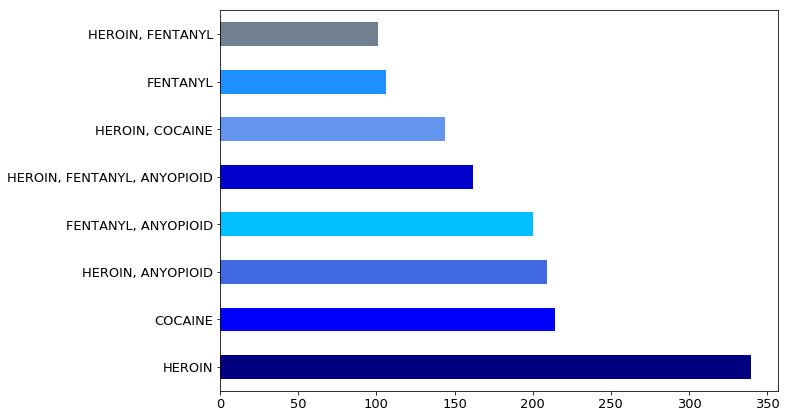

In [151]:
drugs_used_counts = add_df['drugs_used'].value_counts()
drugs_used_counts = drugs_used_counts.loc[drugs_used_counts > 100]
drugs_used_counts.plot(kind='barh', figsize=(10,7), color=['navy', 'blue', 'royalblue', 'deepskyblue', 'mediumblue', 'cornflowerblue', 'dodgerblue', 'slategray'], fontsize=13);
plt.show()

# Age as an explanatory variable?

We will group 'Age' into bins of range 5 to create a population pyramid to get a better understanding of the demographic.

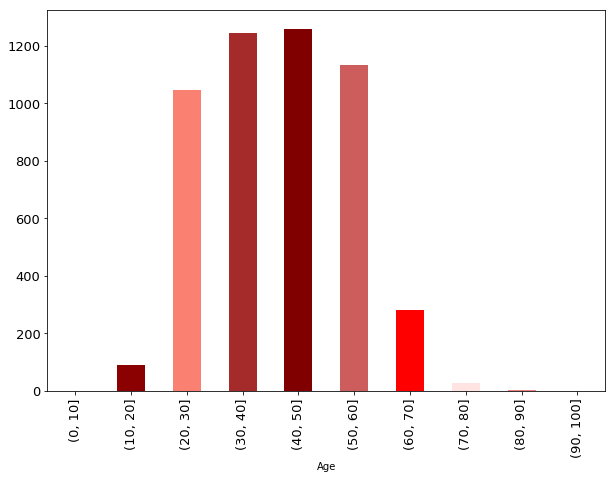

Age
(40, 50]     1260
(30, 40]     1246
(50, 60]     1134
(20, 30]     1045
(60, 70]      282
(10, 20]       91
(70, 80]       27
(80, 90]        3
(90, 100]       0
(0, 10]         0
Name: Age, dtype: int64

In [152]:
#Age graph grouped into a population pyramid for an overview
bins = pd.cut(add_df['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=True)
add_df_Age = add_df.groupby(bins)['Age'].agg('count')
add_df_Age.plot(kind='bar', figsize = (10,7), fontsize=13, color = ['red', 'darkred', 'salmon', 'brown', 'maroon', 'indianred', 'r', 'mistyrose', 'lightcoral', 'darksalmon']);
plt.show()
add_df_Age.sort_values(ascending = False)

In [185]:
# Count differences in Sex

add_df.groupby('Sex')['Age'].count()

Sex
FEMALE    1320
MALE      3767
Name: Age, dtype: int64

In [187]:
# Count differences in Sex by percentage

def percentage (part, whole):
    return 100 * float(part)/float(whole)

percentfemale = percentage (1320, 5087)
percentmale = percentage (3767, 5087)

print('% of Male:', percentmale, '% of Female:', percentfemale)

% of Male: 74.05150383330057 % of Female: 25.94849616669943


In [178]:
# Locating subject with Sex not defined

SexUnknownloc = np.where(add_df['Sex'] == 'UNKNOWN')
SexUnknownloc

(array([4122], dtype=int64),)

In [179]:
# Dropping subject with Sex not defined

add_df.drop(add_df.index[4122], inplace=True)

In [180]:
# Pivot Table, grouped by Sex and Age 

bins = pd.cut(add_df['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], right=True)
sex_age = add_df.pivot_table('Age', index = bins, columns = 'Sex', aggfunc='count')
sex_age

Sex,FEMALE,MALE
Age,,
"(10, 20]",30.0,61.0
"(20, 30]",269.0,776.0
"(30, 40]",275.0,971.0
"(40, 50]",338.0,922.0
"(50, 60]",327.0,807.0
"(60, 70]",70.0,211.0
"(70, 80]",10.0,17.0
"(80, 90]",1.0,2.0


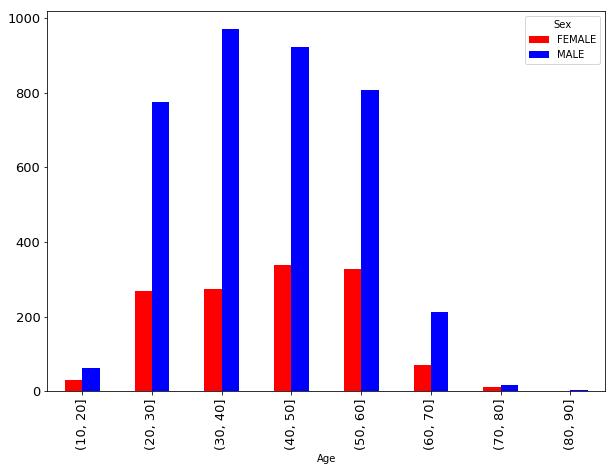

In [181]:
sex_age.plot(kind='bar', figsize = (10,7), fontsize=13, color = ['red', 'blue'])